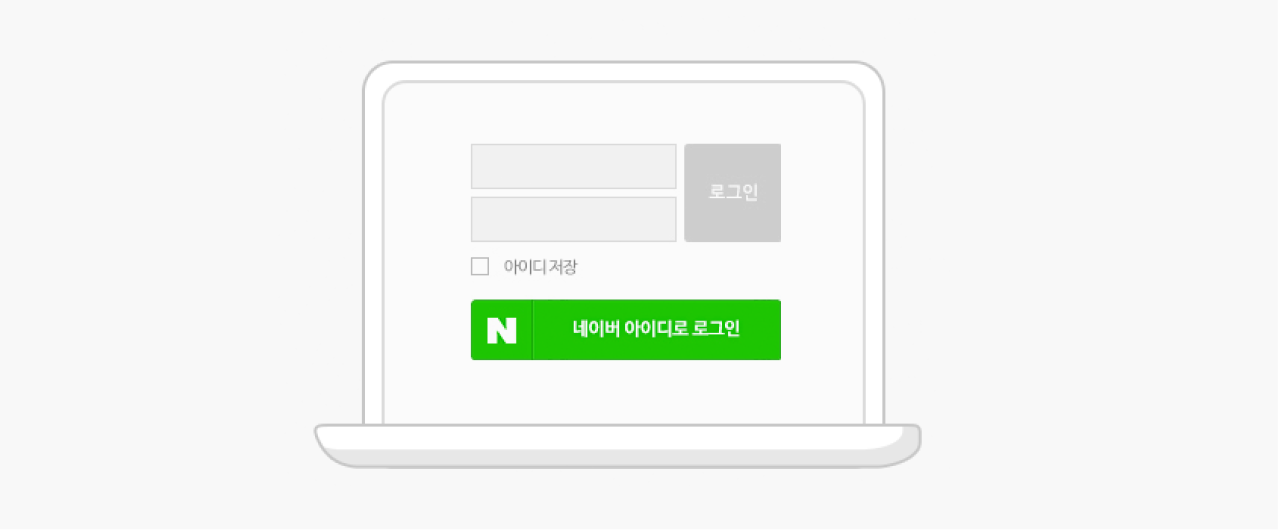

# **네이버 동적 로그인**

In [1]:
# 패키지 임포트
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By # 셀레니움 4.0부터 포함된 함수(필수)
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
# 크롬 웹드라이버 생성 함수
def create_driver():
    service = Service()
    options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(service=service, options=options)
    return driver

## **📮 2가지 진행 방법**

A. 로그인 사이트 'input box'에 driver 통해서 값을 전달하는 방법 (selenium 함수인 send_keys가 값을 전달)

B. 봇으로 판단되서 진행되지 않는 경우 캡쳐(자동입력 방지문자)를 피하는 방법 (javascript 코드가 값을 전달 )

### **1️⃣ 로그인 사이트 'input box'에 driver 통해서 값을 전달하는 방법**

In [47]:
# Driver 객체 생성
driver = create_driver()

In [48]:
# URL 접근
url = 'https://nid.naver.com/nidlogin.login?mode=form&url=https://www.naver.com/'
driver.get(url)

In [51]:
########## ID 입력하기 ###########

In [54]:
# id 입력하는 input box 찾기
id_elem = driver.find_element(By.ID,"id")
id_elem

<selenium.webdriver.remote.webelement.WebElement (session="3615292e503e69ca9a9742ff92de61a5", element="717283312776B1893D2D5A9F7990A966_element_13")>

In [50]:
id_elem.clear() # 기존값 지우기
id_elem.send_keys('아이디입력') # 값 입력 

In [52]:
########## PW 입력하기 ###########

In [53]:
# pw 입력하는 input box 찾기
xpath = '//*[@id="pw"]'
pw_elem = driver.find_element(By.XPATH, xpath)
pw_elem

<selenium.webdriver.remote.webelement.WebElement (session="3615292e503e69ca9a9742ff92de61a5", element="717283312776B1893D2D5A9F7990A966_element_14")>

In [55]:
pw_elem.send_keys('비밀번호입력')

In [ ]:
########## 로그인 버튼 누르기 ###########

In [56]:
# 로그인 버튼 xpath 찾기
xpath = '//*[@id="log.login"]'
login_btn = driver.find_element(By.XPATH, xpath)
login_btn

<selenium.webdriver.remote.webelement.WebElement (session="3615292e503e69ca9a9742ff92de61a5", element="717283312776B1893D2D5A9F7990A966_element_137")>

In [57]:
login_btn.click()

In [58]:
# driver close
driver.close()

### **2️⃣ 봇으로 판단되서 진행되지 않는 경우 캡쳐(자동입력 방지문자)를 피하는 방법**

**[webdriver 통해 javascript 코드 직접 실행]**
1. session 생성 
    - session : 서버가 클라이언트를 관리하는 1개의 단위
    - 웹 접속인 경우 브라우저 탭 1개가 1개의 session (클라이언트)
2. javascript 코드 생성
    - document : 현재 active 된 페이지
    - getElementByXXX('속성값') : document에서 태그객체를 찾는 함수
    - 객체.value : 객체 내 값을 접근하는 방법
3. driver로 script 코드를 직접 실행
    - driver.execute_script('script 코드')

In [59]:
# Driver 객체 생성
driver = create_driver()

In [60]:
# URL 접근
url = 'https://nid.naver.com/nidlogin.login?mode=form&url=https://www.naver.com/'
driver.get(url) # session 1개 생성 : 네이버사이트

In [68]:
# ID/PW 변수 생성
id_input = '아이디'
pw_input = '비밀번호'

In [69]:
# ID/PW 입력하는 input 태그에 값을 설정하는 javascript 코드 생성
id_script = "document.getElementsByName('id')[0].value='"+id_input+"'"
pw_script = "document.getElementsByName('pw')[0].value='"+pw_input+"'"

In [74]:
# javascript 코드를 통해서 값을 전달하기
driver.execute_script(id_script)
driver.execute_script(pw_script)

In [75]:
# 로그인 버튼 클릭하기 
xpath = '//*[@id="log.login"]'
login_btn = driver.find_element(By.XPATH, xpath)
login_btn.click()

In [76]:
# 로그인 된 상태에서 메일 페이지 접근
driver.get('http://mail.naver.com')

In [77]:
# driver close
driver.close()